In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection  import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
import scipy
from scipy import stats
from statsmodels.api import add_constant
import statsmodels.discrete.discrete_model as sm
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.interpolate import interp1d
from sklearn.preprocessing import Imputer

In [41]:
data=pd.read_csv("loans.csv")
data.head()

,credit.policy,purpose,int.rate,installment,annual_inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not_fully_paid
0,1,debt_consolidation,0.1189,829.10,85000.00038,19.48,737,5639.958333,28854,52.1,0.0,0.0,0.0,0
1,1,credit_card,0.1071,228.22,65000.00007,14.29,707,2760.000000,33623,76.7,0.0,0.0,0.0,0
2,1,debt_consolidation,0.1357,366.86,31999.99994,11.63,682,4710.000000,3511,25.6,1.0,0.0,0.0,0
3,1,debt_consolidation,0.1008,162.34,85000.00038,8.10,712,2699.958333,33667,73.2,1.0,0.0,0.0,0
4,1,credit_card,0.1426,102.92,80799.99964,14.97,667,4066.000000,4740,39.5,0.0,1.0,0.0,0


In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
annual_inc           9574 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9549 non-null float64
revol.bal            9578 non-null int64
revol.util           9516 non-null float64
inq.last.6mths       9549 non-null float64
delinq.2yrs          9549 non-null float64
pub.rec              9549 non-null float64
not_fully_paid       9578 non-null int64
dtypes: float64(9), int64(4), object(1)
memory usage: 1.0+ MB


In [43]:
data.describe(include='all')

,credit.policy,purpose,int.rate,installment,annual_inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not_fully_paid
count,9578.000000,9578,9578.000000,9578.000000,9.574000e+03,9578.000000,9578.000000,9549.000000,9.578000e+03,9516.000000,9549.000000,9549.000000,9549.000000,9578.000000
unique,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,debt_consolidation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,3957,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.804970,NaN,0.122640,319.089413,6.838306e+04,12.606679,710.846314,4562.026085,1.691396e+04,46.865677,1.571578,0.163787,0.062101,0.160054
std,0.396245,NaN,0.026847,207.071301,6.122232e+04,6.883970,37.970537,2497.985733,3.375619e+04,29.018642,2.198095,0.546712,0.262152,0.366676
min,0.000000,NaN,0.060000,15.670000,1.896000e+03,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,NaN,0.103900,163.770000,3.850000e+04,7.212500,682.000000,2820.000000,3.187000e+03,22.700000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,NaN,0.122100,268.950000,5.571400e+04,12.665000,707.000000,4139.958333,8.596000e+03,46.400000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,NaN,0.140700,432.762500,8.000400e+04,17.950000,737.000000,5730.000000,1.824950e+04,71.000000,2.000000,0.000000,0.000000,0.000000


In [44]:
data.isnull().sum()

credit.policy         0
purpose               0
int.rate              0
installment           0
annual_inc            4
dti                   0
fico                  0
days.with.cr.line    29
revol.bal             0
revol.util           62
inq.last.6mths       29
delinq.2yrs          29
pub.rec              29
not_fully_paid        0
dtype: int64

In [45]:
data["annual_inc"].median()

55714.00004

In [46]:
data["annual_inc"].fillna(data["annual_inc"].median(), inplace = True) 

In [47]:
data.isnull().sum()

credit.policy         0
purpose               0
int.rate              0
installment           0
annual_inc            0
dti                   0
fico                  0
days.with.cr.line    29
revol.bal             0
revol.util           62
inq.last.6mths       29
delinq.2yrs          29
pub.rec              29
not_fully_paid        0
dtype: int64

In [48]:
data["days.with.cr.line"].fillna(data["days.with.cr.line"].median(), inplace = True) 

In [49]:
data.isnull().sum()

credit.policy         0
purpose               0
int.rate              0
installment           0
annual_inc            0
dti                   0
fico                  0
days.with.cr.line     0
revol.bal             0
revol.util           62
inq.last.6mths       29
delinq.2yrs          29
pub.rec              29
not_fully_paid        0
dtype: int64

In [50]:
data["revol.util"].fillna(data["revol.util"].median(), inplace = True) 

In [51]:
data.isnull().sum()

credit.policy         0
purpose               0
int.rate              0
installment           0
annual_inc            0
dti                   0
fico                  0
days.with.cr.line     0
revol.bal             0
revol.util            0
inq.last.6mths       29
delinq.2yrs          29
pub.rec              29
not_fully_paid        0
dtype: int64

In [52]:
data["inq.last.6mths"].fillna(data["inq.last.6mths"].median(), inplace = True) 


In [53]:
data.isnull().sum()

credit.policy         0
purpose               0
int.rate              0
installment           0
annual_inc            0
dti                   0
fico                  0
days.with.cr.line     0
revol.bal             0
revol.util            0
inq.last.6mths        0
delinq.2yrs          29
pub.rec              29
not_fully_paid        0
dtype: int64

In [54]:
data["delinq.2yrs"].fillna(data["delinq.2yrs"].median(), inplace = True) 

In [55]:
data.isnull().sum()

credit.policy         0
purpose               0
int.rate              0
installment           0
annual_inc            0
dti                   0
fico                  0
days.with.cr.line     0
revol.bal             0
revol.util            0
inq.last.6mths        0
delinq.2yrs           0
pub.rec              29
not_fully_paid        0
dtype: int64

In [56]:
data["pub.rec"].fillna(data["pub.rec"].median(), inplace = True) 

In [57]:
data.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
annual_inc           0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not_fully_paid       0
dtype: int64

In [58]:
df=pd.get_dummies(data,drop_first=True) # drop first Categorical data and create dummy variable
df.head()

,credit.policy,int.rate,installment,annual_inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not_fully_paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,85000.00038,19.48,737,5639.958333,28854,52.1,0.0,0.0,0.0,0,0,1,0,0,0,0
1,1,0.1071,228.22,65000.00007,14.29,707,2760.000000,33623,76.7,0.0,0.0,0.0,0,1,0,0,0,0,0
2,1,0.1357,366.86,31999.99994,11.63,682,4710.000000,3511,25.6,1.0,0.0,0.0,0,0,1,0,0,0,0
3,1,0.1008,162.34,85000.00038,8.10,712,2699.958333,33667,73.2,1.0,0.0,0.0,0,0,1,0,0,0,0
4,1,0.1426,102.92,80799.99964,14.97,667,4066.000000,4740,39.5,0.0,1.0,0.0,0,1,0,0,0,0,0


In [59]:
df.shape

(9578, 19)

In [60]:
data.shape

(9578, 14)

In [61]:
x=df.iloc[:,[0,2,4,5,7,9,10,11,13,14,15,16,17,18]]
y=df["not_fully_paid"]


In [62]:
type(y)

pandas.core.series.Series

In [63]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1) # test size is for proportion
lg=LogisticRegression()   # logistic Regression
lg.fit(x_train,y_train)      
pred_train=lg.predict(x_train)      # predict
cm=pd.crosstab(y_train,pred_train)
cm

col_0,0,1
not_fully_paid,,
0,5631,17
1,1046,10


In [64]:
pred1=lg.predict(x_test)
pred1


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [65]:
predprob=lg.predict_proba(x_test) # predict the probability instead of 1's and 0's directly 

predprob1=predprob[:,1]
x=[]
for i in predprob1:
    if i>0.4:                      # Create a threshold 
        x.append(1)
    else:
        x.append(0)
    

In [66]:
pd.crosstab(y_test,np.array(x))  #convert it into array

col_0,0,1
not_fully_paid,,
0,2383,14
1,460,17


In [67]:
predprob[:,1]

array([0.22646861, 0.28350119, 0.24025831, ..., 0.09598678, 0.37241765,
       0.12629428])

In [68]:
type(pred1)

numpy.ndarray

In [69]:
acc=(5631+10)/x_train.shape[0]   # accuracy
acc


0.8414379474940334

In [70]:
cm1=pd.crosstab(y_test,pred1)
type(cm1)
cm1

col_0,0,1
not_fully_paid,,
0,2393,4
1,466,11


In [71]:
acc=(2393+11)/x_test.shape[0]   # accuracy
acc


0.8364648573416841

In [72]:
lg.score(x_test,y_test)

0.8364648573416841

In [73]:
lg.score(x_train,y_train)

0.8414379474940334

In [171]:

X2 = add_constant(x_train)

logit=sm.Logit(y_train,X2)


In [75]:
result=logit.fit()

Optimization terminated successfully.
         Current function value: 0.408591
         Iterations 6


In [76]:
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:         not_fully_paid   No. Observations:                 6704
Model:                          Logit   Df Residuals:                     6689
Method:                           MLE   Df Model:                           14
Date:                Wed, 16 Jan 2019   Pseudo R-squ.:                 0.06185
Time:                        12:58:55   Log-Likelihood:                -2739.2
converged:                       True   LL-Null:                       -2919.8
                                        LLR p-value:                 1.829e-68
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          6.1463      0.801      7.676      0.000       4.577       7.716
credit.policy                 -0.4473      0.098     -4.586      0.000      -0.638 

In [77]:
df.head()

,credit.policy,int.rate,installment,annual_inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not_fully_paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,85000.00038,19.48,737,5639.958333,28854,52.1,0.0,0.0,0.0,0,0,1,0,0,0,0
1,1,0.1071,228.22,65000.00007,14.29,707,2760.000000,33623,76.7,0.0,0.0,0.0,0,1,0,0,0,0,0
2,1,0.1357,366.86,31999.99994,11.63,682,4710.000000,3511,25.6,1.0,0.0,0.0,0,0,1,0,0,0,0
3,1,0.1008,162.34,85000.00038,8.10,712,2699.958333,33667,73.2,1.0,0.0,0.0,0,0,1,0,0,0,0
4,1,0.1426,102.92,80799.99964,14.97,667,4066.000000,4740,39.5,0.0,1.0,0.0,0,1,0,0,0,0,0


In [78]:
df.groupby("not_fully_paid")["int.rate","pub.rec"].agg([np.mean,np.std])

int.rate             pub.rec          
                    mean       std      mean       std
not_fully_paid                                        
0               0.120770  0.026692  0.056308  0.255105
1               0.132452  0.025495  0.091324  0.292659

In [79]:
df["not_fully_paid"].value_counts()

0    8045
1    1533
Name: not_fully_paid, dtype: int64

# Day 4

In [80]:
from sklearn import metrics

C:\Users\lenovo\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


(-0.05, 1.05)

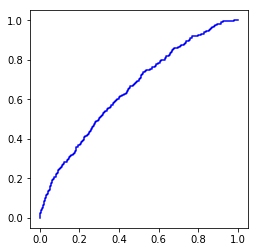

In [81]:
fpr,tpr,threshold=metrics.roc_curve(y_test,predprob[:,1])   # fpr -False posititve Ratio, tpr- True positive ratio
plt.plot(fpr,tpr,label="ROC curve",color="b")
plt.axes().set_aspect("equal")
plt.xlim([-0.05,1.05])  # if we donot mention this the graph will start from 0 and end in 1
plt.ylim([-0.05,1.05])  # if we donot mention this the graph will start from 0 and end in 1

# Titanic Data


In [82]:
df1=pd.read_csv("Titanic_train.csv")
df2=pd.read_csv("Titanic_test.csv")


In [83]:
df2["Survived"]=-111

In [84]:
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [85]:
df2.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,-111
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,-111
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,-111
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,-111
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,-111


In [86]:
df=pd.concat([df1,df2],axis=0,sort=False)

In [87]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [88]:
df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,1309.000000,1309.000000,1309.000000,1309,1309,1046.000000,1309.000000,1309.000000,1309,1308.000000,295,1307
unique,NaN,NaN,NaN,1307,2,NaN,NaN,NaN,929,NaN,186,3
top,NaN,NaN,NaN,"Connolly, Miss. Kate",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,2,843,NaN,NaN,NaN,11,NaN,6,914
mean,655.000000,-35.184110,2.294882,NaN,NaN,29.881138,0.498854,0.385027,NaN,33.295479,NaN,NaN
std,378.020061,51.950346,0.837836,NaN,NaN,14.413493,1.041658,0.865560,NaN,51.758668,NaN,NaN
min,1.000000,-111.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,328.000000,-111.000000,2.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,655.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,982.000000,1.000000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.275000,NaN,NaN


In [89]:
df.isnull().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [90]:
df3=df[df["Fare"].isna()]
df3


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,-111,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [91]:
df.Sex.value_counts()

male      843
female    466
Name: Sex, dtype: int64

In [92]:
df.groupby(['Pclass', 'Embarked']).Fare.median()

Pclass  Embarked
1       C           76.7292
        Q           90.0000
        S           52.0000
2       C           15.3146
        Q           12.3500
        S           15.3750
3       C            7.8958
        Q            7.7500
        S            8.0500
Name: Fare, dtype: float64

In [93]:
median_fare = df.loc[(df.Pclass == 3) & (df.Embarked == 'S'),'Fare'].median()
print(median_fare)

8.05


In [94]:
df["Fare"].fillna(median_fare,inplace=True)

In [95]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [96]:
df.isnull().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          2
dtype: int64

In [97]:
df[df["Embarked"].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [98]:
df[df["Cabin"]=="B28"]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [99]:
a=df[df["Pclass"]==1]
a[a["Fare"]==80].Embarked.mode()

Series([], dtype: object)

In [100]:
df["Embarked"].fillna("C",inplace=True)

In [101]:
df[df.Age.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
29,30,0,3,"Todoroff, Mr. Lalio",male,NaN,0,0,349216,7.8958,NaN,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
32,33,1,3,"Glynn, Miss. Mary Agatha",female,NaN,0,0,335677,7.7500,NaN,Q
36,37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,NaN,C
42,43,0,3,"Kraeff, Mr. Theodor",male,NaN,0,0,349253,7.8958,NaN,C


In [102]:
def GetTitle(name):
    first_name_with_title = name.split(',')[1]
    title = first_name_with_title.split('.')[0]
    title = title.strip().lower()
    return title

In [103]:
df.Name.map(lambda x : GetTitle(x))

0          mr
1         mrs
2        miss
3         mrs
4          mr
5          mr
6          mr
7      master
8         mrs
9         mrs
10       miss
11       miss
12         mr
13         mr
14       miss
15        mrs
16     master
17         mr
18        mrs
19        mrs
20         mr
21         mr
22       miss
23         mr
24       miss
25        mrs
26         mr
27         mr
28       miss
29         mr
        ...  
388        mr
389    master
390        mr
391       mrs
392    master
393        mr
394        mr
395       mrs
396        mr
397       mrs
398        mr
399        mr
400      miss
401        mr
402      miss
403        mr
404        mr
405        mr
406        mr
407        mr
408      miss
409      miss
410      miss
411       mrs
412      miss
413        mr
414      dona
415        mr
416        mr
417    master
Name: Name, Length: 1309, dtype: object

In [104]:
df['Title'] =  df.Name.map(lambda x : GetTitle(x))
df.Title

0          mr
1         mrs
2        miss
3         mrs
4          mr
5          mr
6          mr
7      master
8         mrs
9         mrs
10       miss
11       miss
12         mr
13         mr
14       miss
15        mrs
16     master
17         mr
18        mrs
19        mrs
20         mr
21         mr
22       miss
23         mr
24       miss
25        mrs
26         mr
27         mr
28       miss
29         mr
        ...  
388        mr
389    master
390        mr
391       mrs
392    master
393        mr
394        mr
395       mrs
396        mr
397       mrs
398        mr
399        mr
400      miss
401        mr
402      miss
403        mr
404        mr
405        mr
406        mr
407        mr
408      miss
409      miss
410      miss
411       mrs
412      miss
413        mr
414      dona
415        mr
416        mr
417    master
Name: Title, Length: 1309, dtype: object

In [105]:
title_age_median = df.groupby('Title').Age.transform('median')
df.Age.fillna(title_age_median , inplace=True)

In [106]:
del(df["Cabin"])

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
PassengerId    1309 non-null int64
Survived       1309 non-null int64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1309 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1309 non-null float64
Embarked       1309 non-null object
Title          1309 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 132.9+ KB


In [108]:
df1.shape

(891, 12)

In [109]:
df2.shape


(418, 12)

In [110]:
del(df["Name"])

In [111]:
del(df["Title"])

In [112]:
del(df["Ticket"])

In [113]:
newdata=pd.get_dummies(df,drop_first=True) # drop first Categorical data and create dummy variable
newdata.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [114]:
dfn=newdata

In [115]:
dfn.shape

(1309, 10)

In [116]:
train=dfn.head(891)
test=dfn.tail(418)



In [117]:
x=train.iloc[:,[2,3,4,6,7]]
y=train["Survived"]


In [118]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [119]:
lg=LogisticRegression()   # logistic Regression
lg.fit(x_train,y_train)      
pred_train=lg.predict(x_train)      # predict
cm=pd.crosstab(y_train,pred_train)
cm

col_0,0,1
Survived,,
0,347,49
1,72,155


In [120]:
pred1=lg.predict(x_test)
pred1


array([1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0], dtype=int64)

In [121]:
cm=pd.crosstab(y_test,pred1)
cm

col_0,0,1
Survived,,
0,135,18
1,41,74


In [122]:
lg.score(x_test,y_test)

0.7798507462686567

In [123]:
acc=(135+74)/x_test.shape[0]
acc

0.7798507462686567

In [124]:
x_train=train.iloc[:,[2,3,4,6,7]]
x_test=test.iloc[:,[2,3,4,6,7]]
y_train=train["Survived"]
y_test=test["Survived"]

In [125]:
x_train

,Pclass,Age,SibSp,Fare,Sex_male
0,3,22.0,1,7.2500,1
1,1,38.0,1,71.2833,0
2,3,26.0,0,7.9250,0
3,1,35.0,1,53.1000,0
4,3,35.0,0,8.0500,1
5,3,29.0,0,8.4583,1
6,1,54.0,0,51.8625,1
7,3,2.0,3,21.0750,1
8,3,27.0,0,11.1333,0
9,2,14.0,1,30.0708,0


In [126]:
lg=LogisticRegression()   # logistic Regression
lg.fit(x_train,y_train)      
 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [127]:
survived_pred=lg.predict(x_test)
survived_pred.sum()

150

In [128]:
test["Survived"]=survived_pred

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [129]:
test.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,892,0,3,34.5,0,0,7.8292,1,1,0
1,893,0,3,47.0,1,0,7.0000,0,0,1
2,894,0,2,62.0,0,0,9.6875,1,1,0
3,895,0,3,27.0,0,0,8.6625,1,0,1
4,896,1,3,22.0,1,1,12.2875,0,0,1


In [130]:
test_file=test[["PassengerId","Survived"]]

In [131]:
test_file.to_csv("Titanic.csv",index=False)

# Day 4

In [132]:
df=pd.read_csv("parole1.1.csv")

In [133]:
df.head()

,male,race,age,state,time.served,max.sentence,multiple.offenses,crime,violator
0,1,1,33.2,1,5.5,18,0,4,0
1,0,1,39.7,1,5.4,12,0,3,0
2,1,2,29.5,1,5.6,12,0,3,0
3,1,1,22.4,1,5.7,18,0,1,0
4,1,2,21.6,1,5.4,12,0,1,0


In [134]:
df.tail()

,male,race,age,state,time.served,max.sentence,multiple.offenses,crime,violator
733,1,2,33.4,3,11.2,12,1,1,1
734,1,2,29.3,3,1.4,12,1,1,1
735,1,1,31.4,3,2.9,12,1,1,1
736,1,2,20.6,3,12.0,8,1,3,1
737,0,2,28.8,3,14.9,12,0,1,1


In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 738 entries, 0 to 737
Data columns (total 9 columns):
male                 738 non-null int64
race                 738 non-null int64
age                  738 non-null float64
state                738 non-null int64
time.served          738 non-null float64
max.sentence         738 non-null int64
multiple.offenses    738 non-null int64
crime                738 non-null int64
violator             738 non-null int64
dtypes: float64(2), int64(7)
memory usage: 52.0 KB


In [136]:
df.describe()

,male,race,age,state,time.served,max.sentence,multiple.offenses,crime,violator
count,738.000000,738.000000,738.000000,738.000000,738.000000,738.000000,738.000000,738.000000,738.000000
mean,0.807588,1.432249,34.694444,2.840108,4.370867,12.886179,0.551491,2.043360,0.191057
std,0.394462,0.495725,10.293642,1.206682,1.934807,3.164945,0.497679,1.124908,0.393400
min,0.000000,1.000000,17.900000,1.000000,-4.900000,1.000000,0.000000,1.000000,0.000000
25%,1.000000,1.000000,25.600000,2.000000,3.225000,12.000000,0.000000,1.000000,0.000000
50%,1.000000,1.000000,33.900000,3.000000,4.400000,12.000000,1.000000,2.000000,0.000000
75%,1.000000,2.000000,42.875000,4.000000,5.200000,15.000000,1.000000,3.000000,0.000000
max,1.000000,2.000000,67.000000,4.000000,14.900000,18.000000,1.000000,4.000000,1.000000


In [137]:
df.isnull().sum()

male                 0
race                 0
age                  0
state                0
time.served          0
max.sentence         0
multiple.offenses    0
crime                0
violator             0
dtype: int64

In [138]:
def get(x):
    if x==1:
        y="Male"
    else:
        y="Female"
    return y

In [139]:
y=df.male.map(lambda x: get(x))    
df["Gender"]=y

In [140]:
df.head(10)

,male,race,age,state,time.served,max.sentence,multiple.offenses,crime,violator,Gender
0,1,1,33.2,1,5.5,18,0,4,0,Male
1,0,1,39.7,1,5.4,12,0,3,0,Female
2,1,2,29.5,1,5.6,12,0,3,0,Male
3,1,1,22.4,1,5.7,18,0,1,0,Male
4,1,2,21.6,1,5.4,12,0,1,0,Male
5,1,2,46.7,1,6.0,18,0,4,0,Male
6,1,1,31.0,1,6.0,18,0,3,0,Male
7,0,1,24.6,1,4.8,12,0,1,0,Female
8,0,1,32.6,1,4.5,13,0,3,0,Female
9,1,2,29.1,1,4.7,12,0,2,0,Male


In [141]:
df.state.nunique()

4

In [142]:
def get(x):
    if x==1:
        y="State1"
    elif x==2:
        y="State2"
    elif x==3:
        y="State3"
    elif x==4:
        y="State4"
    return y

In [143]:
y=df.state.map(lambda x: get(x))    
df["state"]=y

In [144]:
df.tail(10)

,male,race,age,state,time.served,max.sentence,multiple.offenses,crime,violator,Gender
728,0,2,39.8,State3,11.6,12,0,2,1,Female
729,1,2,17.9,State3,8.4,3,1,3,1,Male
730,1,2,20.2,State3,1.7,6,1,3,1,Male
731,1,2,47.1,State3,-4.9,18,1,3,1,Male
732,1,1,40.0,State3,7.9,5,0,2,1,Male
733,1,2,33.4,State3,11.2,12,1,1,1,Male
734,1,2,29.3,State3,1.4,12,1,1,1,Male
735,1,1,31.4,State3,2.9,12,1,1,1,Male
736,1,2,20.6,State3,12.0,8,1,3,1,Male
737,0,2,28.8,State3,14.9,12,0,1,1,Female


In [145]:
del(df["male"])

In [146]:
df.race.nunique()

2

In [147]:
def get(x):
    if x==1:
        y="Race1"
    else:
        y="Race2"
    
    return y

In [148]:
y=df.race.map(lambda x: get(x))    
df["race"]=y

In [149]:
df.head()

,race,age,state,time.served,max.sentence,multiple.offenses,crime,violator,Gender
0,Race1,33.2,State1,5.5,18,0,4,0,Male
1,Race1,39.7,State1,5.4,12,0,3,0,Female
2,Race2,29.5,State1,5.6,12,0,3,0,Male
3,Race1,22.4,State1,5.7,18,0,1,0,Male
4,Race2,21.6,State1,5.4,12,0,1,0,Male


In [150]:
df.crime.nunique()

4

In [151]:
def get(x):
    if x==1:
        y="Crime1"
    elif x==2:
        y="Crime2"
    elif x==3:
        y="Crime3"
    elif x==4:
        y="Crime4"
    return y

In [152]:
y=df.crime.map(lambda x: get(x))    
df["crime"]=y

In [153]:
df=pd.get_dummies(df,drop_first=True) # drop first Categorical data and create dummy variable
df.head()
df.shape


(738, 13)

In [154]:
df.head()

,age,time.served,max.sentence,multiple.offenses,violator,race_Race2,state_State2,state_State3,state_State4,crime_Crime2,crime_Crime3,crime_Crime4,Gender_Male
0,33.2,5.5,18,0,0,0,0,0,0,0,0,1,1
1,39.7,5.4,12,0,0,0,0,0,0,0,1,0,0
2,29.5,5.6,12,0,0,1,0,0,0,0,1,0,1
3,22.4,5.7,18,0,0,0,0,0,0,0,0,0,1
4,21.6,5.4,12,0,0,1,0,0,0,0,0,0,1


In [155]:
x=df.iloc[:,[1,2,3,5,6,7,8,9,10,11,12]]
y=df["violator"]

In [156]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1) # test size is for proportion , if we dont provide test_size then by default it will take 0.25
lg=LogisticRegression()   # logistic Regression
lg.fit(x_train,y_train)      
pred_train=lg.predict(x_train)      # predict
cm=pd.crosstab(y_train,pred_train)
cm

col_0,0,1
violator,,
0,408,17
1,50,41


In [157]:
pred_test=lg.predict(x_test)  

In [158]:
cm=pd.crosstab(y_test,pred_test)
cm


col_0,0,1
violator,,
0,168,4
1,29,21


In [159]:
lg.score(x_test,y_test)

0.8513513513513513

In [160]:
predprob=lg.predict_proba(x_test)

In [161]:
from sklearn import metrics

C:\Users\lenovo\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


(-0.05, 1.05)

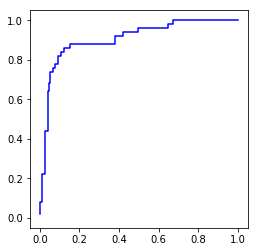

In [162]:

fpr,tpr,threshold=metrics.roc_curve(y_test,predprob[:,1])   # fpr -False posititve Ratio, tpr- True positive ratio
plt.plot(fpr,tpr,label="ROC curve",color="b")
plt.axes().set_aspect("equal")
plt.xlim([-0.05,1.05])  # if we donot mention this the graph will start from 0 and end in 1
plt.ylim([-0.05,1.05])  # if we donot mention this the graph will start from 0 and end in 1

In [163]:
# Area Under the curve
metrics.auc(fpr,tpr)

0.9062790697674419

In [164]:
tp=cm[1][1]
tn=cm[0][0]
fn=cm[0][1]
fp=cm[1][0]

accu=((tn+tp)/(tp+tn+fp+fn))
error=((fn+fp)/(tp+tn+fp+fn))
sensi=(tp/(tp+fn))
preci=(tp/(tp+fp))
speci=(tn/(tn+fp))

print("Accuracy:",accu)
print("Error:",error)
print("Sensitivity:",sensi)
print("Precision:",preci)
print("Specificity:",speci)

Accuracy: 0.8513513513513513
Error: 0.14864864864864866
Sensitivity: 0.42
Precision: 0.84
Specificity: 0.9767441860465116


In [165]:
predprob1=predprob[:,1]
x=[]
for i in predprob1:
    if i>0.4:                      # Create a threshold 
        x.append(1)
    else:
        x.append(0)

In [166]:
# Area Under the curve
metrics.auc(fpr,tpr)

0.9062790697674419